In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from optimizers.simulations.order import low_param_simulate_from_order_func
from optimizers.utils._utils import get_csv_data
from optimizers.utils.cross_validators import vbt_cv_sliding_constructor

In [2]:
pair = "xlm1inch"
opens = get_csv_data(f"data/{pair}_hourly_opens.csv")
closes = get_csv_data(f"data/{pair}_hourly_closes.csv")
print(f"Full data length: {closes.shape[0]}")

train_opens, opens = train_test_split(opens, test_size=0.30, train_size=0.70, shuffle=False)
train_closes, closes = train_test_split(closes, test_size=0.30, train_size=0.70, shuffle=False)
close_folds = vbt_cv_sliding_constructor(train_closes, n_splits=3)
open_folds = vbt_cv_sliding_constructor(train_opens, n_splits=3)

print(f"Test data length: {opens.shape[0]}")
print(f"Train fold length {close_folds[0].shape[0]}")

Full data length: 13267
Test data length: 3981
Train fold length 3095


In [3]:
# Extremely successful pair: BNB API3 3.1 1.7 1.3e-6 2e-4 LOG

In [68]:
pf = low_param_simulate_from_order_func(
    closes, opens,
    entry=5.0,
    exit=1.1,
    delta=6e-9,
    vt=1.e-5,
    mode='log',
    hedge='beta',
    freq='h',
    burnin=800,
    order_size=0.50,
)

-0.45778677454077044


<AxesSubplot:xlabel='time'>

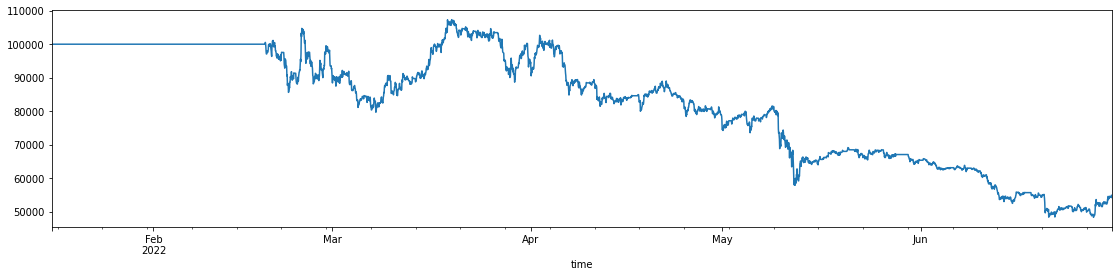

In [69]:
print(pf.total_return())

pf.value().plot(figsize=(19,4))

In [64]:
res = pf.trades.records_readable.groupby("Entry Timestamp").sum()

print(f"Total trades: {res.shape[0]}")
print(f"Executed trades: {pf.trades.records_readable.shape[0]}")
print(f"Profit Ratio: {res.PnL[res.PnL > 0].median() / np.abs(res.PnL[res.PnL < 0].median()):.3f}")
print(f"Net long-short win rate: {res.PnL[res.PnL > 0].shape[0] / res.shape[0] * 100:.2f}%")
print(f"Median trade profit: {res.PnL.median():.2f}")
print(f"Mean trade profit: {res.PnL.mean():.2f}")
print(f"STD of trade profit: {res.PnL.std():.2f}")
print(f"Sharpe Ratio: {pf.sharpe_ratio():.4f}")

Total trades: 152
Executed trades: 304
Profit Ratio: 0.616
Net long-short win rate: 57.89%
Median trade profit: 166.54
Mean trade profit: -208.04
STD of trade profit: 2065.91
Sharpe Ratio: -1.4528


<AxesSubplot:xlabel='Entry Timestamp'>

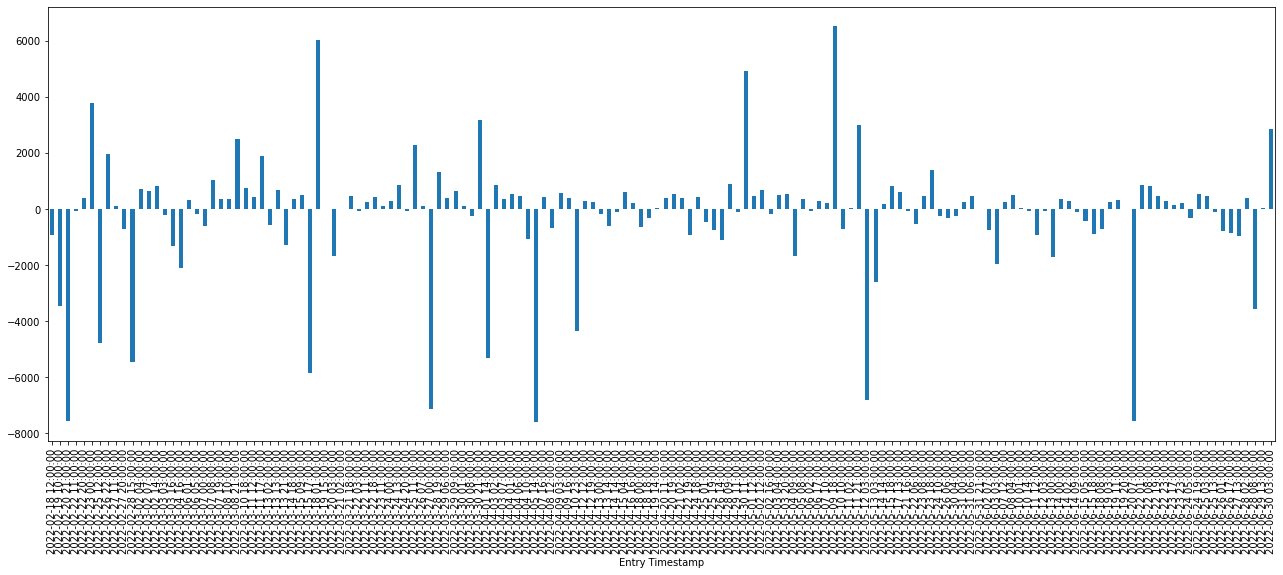

In [65]:
res.PnL.plot(kind="bar", figsize=(22,8))